In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from pyiron import Project

In [2]:
pr=Project('FreeEnergy')
pot = '1995--Angelo-J-E--Ni-Al-H--LAMMPS--ipr1'
# pr.remove_jobs_silently(recursive=True)

In [3]:
alat = 3.5
basis = pr.create_ase_bulk('Ni')
ham = pr.create_job(pr.job_type.Lammps, 'ref')
ham.structure = basis
ham.potential = pot
murn = pr.create_job(job_type=pr.job_type.Murnaghan, job_name='murnaghan')
murn.ref_job = ham
murn.run()

The job murnaghan was saved and received the ID: 207
The job strain_0_9 was saved and received the ID: 208
The job strain_0_92 was saved and received the ID: 209
The job strain_0_94 was saved and received the ID: 210
The job strain_0_96 was saved and received the ID: 211
The job strain_0_98 was saved and received the ID: 212
The job strain_1_0 was saved and received the ID: 213
The job strain_1_02 was saved and received the ID: 214
The job strain_1_04 was saved and received the ID: 215
The job strain_1_06 was saved and received the ID: 216
The job strain_1_08 was saved and received the ID: 217
The job strain_1_1 was saved and received the ID: 218
job_id:  208 finished
job_id:  209 finished
job_id:  210 finished
job_id:  211 finished
job_id:  212 finished
job_id:  213 finished
job_id:  214 finished
job_id:  215 finished
job_id:  216 finished
job_id:  217 finished
job_id:  218 finished


In [4]:
print (murn['output/equilibrium_b_prime'])
print (murn['output/equilibrium_volume']**(1/3))

4.204514938124235
2.2174331116927366


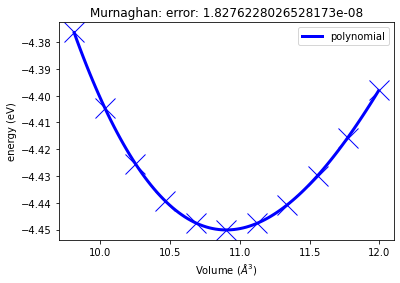

In [5]:
murn.plot()

In [6]:
T_debye_low, T_debye_high = murn.fit.debye_temperature
print (T_debye_low)

[445.76166752 442.54156191 439.35906614 436.21357484 433.10449505
 430.03124589 426.99325828 423.98997461 421.02084851 418.08534454
 415.18293795 412.31311439 409.47536969 406.6692096  403.89414956
 401.14971446 398.43543845 395.75086465 393.09554504 390.46904014
 387.87091893 385.30075853 382.75814413 380.24266873 377.75393296
 375.29154497 372.85512018 370.44428118 368.05865752 365.69788558
 363.36160842 361.04947562 358.76114315 356.49627319 354.25453404
 352.03559999 349.83915112 347.66487325 345.51245779 343.38160161
 341.27200692 339.18338118 337.11543696 335.06789185 333.04046836
 331.03289378 329.04490013 327.07622401 325.12660655 323.1957933 ]


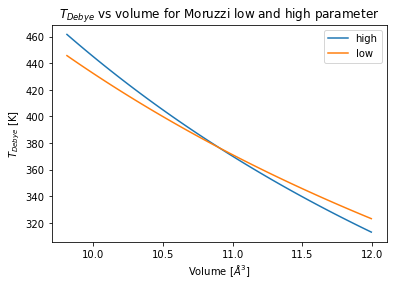

In [7]:
plt.plot(murn.fit.volume, T_debye_high, label='high')
plt.plot(murn.fit.volume, T_debye_low, label='low')
plt.title('$T_{Debye}$ vs volume for Moruzzi low and high parameter')
plt.xlabel('Volume [$\AA^3$]')
plt.ylabel('$T_{Debye}$ [K]')
plt.legend();

In [8]:
pes = pr.create_object(object_type=pr.object_type.ThermoBulk)
pes.temperatures = np.linspace(1, 1500, 200)
pes.volumes = murn.fit.volume
pes.energies = murn.fit.polynomial()
pes.energies += murn.fit.energy_vib(T=pes.temperatures, low_T_limit=True).T

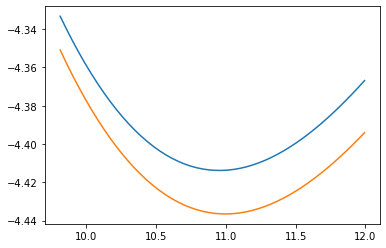

In [9]:
plt.plot(pes.volumes, pes.energies[0])
plt.plot(pes.volumes, pes.energies[30])

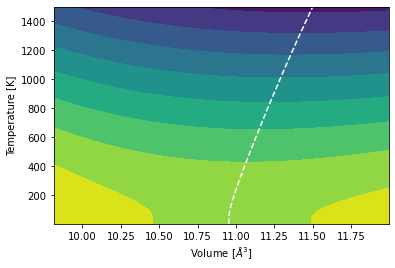

In [10]:
pes.plot_contourf(show_min_erg_path=True);

In [11]:
pes_fine = pes.copy()
pes_fine.set_volumes(volume_min=murn.equilibrium_volume, volume_max=murn.equilibrium_volume*1.1, volume_steps=100)
murn.fit.volume = pes_fine.volumes
murn_fine = pes_fine.copy()
murn_fine.energies = murn.fit.polynomial() 
pes_fine.energies = murn_fine.energies + murn.fit.energy_vib(T=pes_fine.temperatures, low_T_limit=True).T

In [12]:
print (pes_fine.temperatures)

[1.00000000e+00 8.53266332e+00 1.60653266e+01 2.35979899e+01
 3.11306533e+01 3.86633166e+01 4.61959799e+01 5.37286432e+01
 6.12613065e+01 6.87939698e+01 7.63266332e+01 8.38592965e+01
 9.13919598e+01 9.89246231e+01 1.06457286e+02 1.13989950e+02
 1.21522613e+02 1.29055276e+02 1.36587940e+02 1.44120603e+02
 1.51653266e+02 1.59185930e+02 1.66718593e+02 1.74251256e+02
 1.81783920e+02 1.89316583e+02 1.96849246e+02 2.04381910e+02
 2.11914573e+02 2.19447236e+02 2.26979899e+02 2.34512563e+02
 2.42045226e+02 2.49577889e+02 2.57110553e+02 2.64643216e+02
 2.72175879e+02 2.79708543e+02 2.87241206e+02 2.94773869e+02
 3.02306533e+02 3.09839196e+02 3.17371859e+02 3.24904523e+02
 3.32437186e+02 3.39969849e+02 3.47502513e+02 3.55035176e+02
 3.62567839e+02 3.70100503e+02 3.77633166e+02 3.85165829e+02
 3.92698492e+02 4.00231156e+02 4.07763819e+02 4.15296482e+02
 4.22829146e+02 4.30361809e+02 4.37894472e+02 4.45427136e+02
 4.52959799e+02 4.60492462e+02 4.68025126e+02 4.75557789e+02
 4.83090452e+02 4.906231

In [13]:
pes_fine_high = pes_fine.copy()
pes_fine_high.energies = murn_fine.energies + murn.fit.energy_vib(T=pes_fine_high.temperatures, 
                                                                  low_T_limit=False).T

In [14]:
# print (pes_fine_high.temperatures)

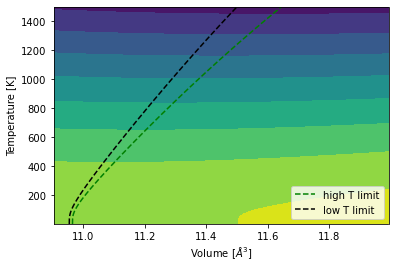

In [15]:
ax = pes_fine_high.plot_contourf()
ax = pes_fine_high.plot_min_energy_path('g--', ax=ax, label='high T limit')
ax = pes_fine.plot_min_energy_path('k--', ax=ax, label='low T limit')
ax.legend(loc='lower right');

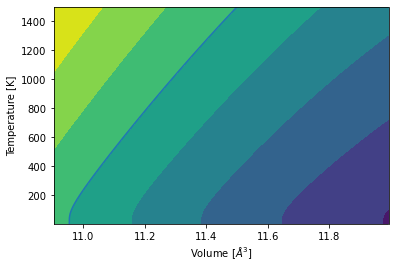

In [16]:
pes_fine.contour_pressure()

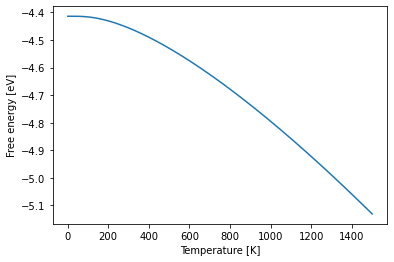

In [17]:
pes_fine.plot_free_energy()

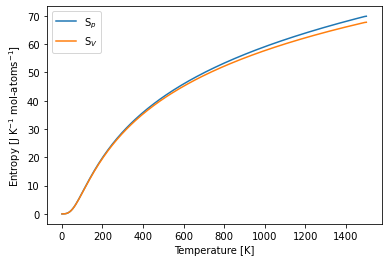

In [18]:
pes_fine.plot_entropy()

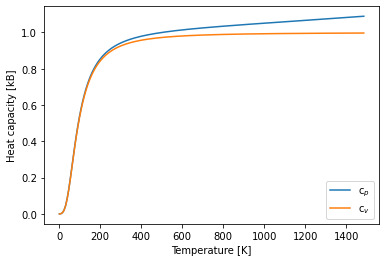

In [19]:
pes_fine.num_atoms = 3
pes_fine.plot_heat_capacity(to_kB=True)

In [20]:
pes_QHA = pes_fine.copy()
pes_QHA.set_volumes(volume_min=np.min(pes_QHA.volumes), volume_max=np.max(pes_QHA.volumes), volume_steps=7)

alat_lst = pes_QHA.volumes**(1/3)
print (alat_lst)

[2.21743311 2.22968437 2.24180246 2.25379094 2.26565321 2.27739256
 2.28901211]
